# Практическое задание к уроку 2

In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import tensorflow as tf

In [2]:
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


In [12]:
def test_model(epoch,bath_s,n1,n2):

    # Build the model.
    model = Sequential([
      Dense(n1, activation='relu', input_shape=(784,)),
      Dense(n2, activation='relu'),
      Dense(10, activation='softmax'),])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],)

    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epoch,
      batch_size=bath_s,verbose=0)
    return model

10000/10000 [==============================] - 4s 413us/step


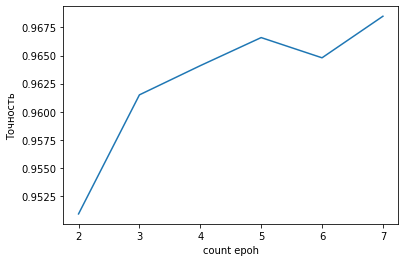

In [22]:
result=[]
for epoch in range(2,8):
    model=test_model(epoch,32,64,64)
    accur=model.evaluate(test_images,
                         to_categorical(test_labels))
        
    result.append(accur[1])
       # print(f'Точность нейронной сети при парам {param}={i} : {answer}')
plt.plot(range(2,8),result)  
plt.xlabel('count epoch')
plt.ylabel('Точность')
plt.show()


10000/10000 [==============================] - 2s 165us/step


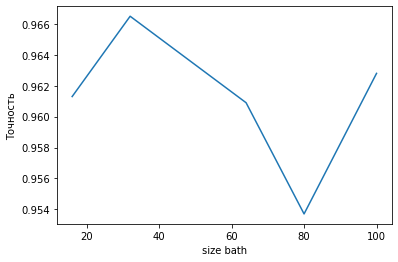

In [9]:
result=[]
for bath in [16,32,64,80,100]:
    model=test_model(5,bath,64,64)
    accur=model.evaluate(test_images,
                         to_categorical(test_labels))
        
    result.append(accur[1])
       # print(f'Точность нейронной сети при парам {param}={i} : {answer}')
plt.plot( [16,32,64,80,100],result)  
plt.xlabel('size bath')
plt.ylabel('Точность')
plt.show()

10000/10000 [==============================] - 2s 174us/step


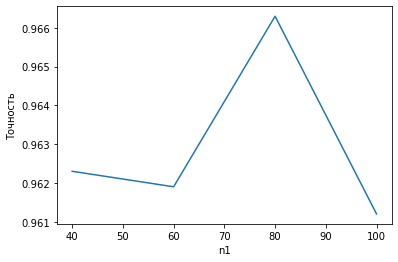

In [13]:
result=[]
for n1 in [40,64,80,100]:
    model=test_model(5,32,n1,64)
    accur=model.evaluate(test_images,
                         to_categorical(test_labels))
        
    result.append(accur[1])
       # print(f'Точность нейронной сети при парам {param}={i} : {answer}')
plt.plot( [40,60,80,100],result)  
plt.xlabel('n1')
plt.ylabel('Точность')
plt.show()

10000/10000 [==============================] - 2s 179us/step


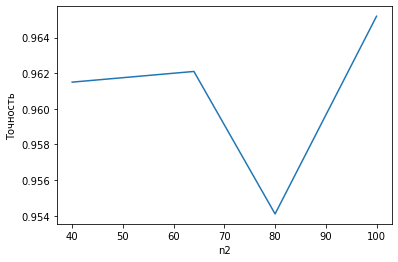

In [14]:
result=[]
for n2 in [40,64,80,100]:
    model=test_model(5,32,64,n2)
    accur=model.evaluate(test_images,
                         to_categorical(test_labels))
        
    result.append(accur[1])
       # print(f'Точность нейронной сети при парам {param}={i} : {answer}')
plt.plot( [40,64,80,100],result)  
plt.xlabel('n2')
plt.ylabel('Точность')
plt.show()

10000/10000 [==============================] - 3s 275us/step


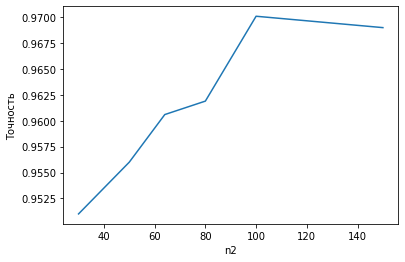

In [18]:
result=[]
for n2 in [30,50,64,80,100,150]:
    model=test_model(5,32,n2,n2)
    accur=model.evaluate(test_images,
                         to_categorical(test_labels))
        
    result.append(accur[1])
       # print(f'Точность нейронной сети при парам {param}={i} : {answer}')
plt.plot( [30,50,64,80,100,150],result)  
plt.xlabel('n2')
plt.ylabel('Точность')
plt.show()

### 1.  Вывод:
- Увеличение количества эпох позваляет увеличить точность но после некоторого значения точность повышается незначительство, по сравнению с временем обработки
- варьирование размером bath, также позваляет повысить точность или скорость обработки. т.к Keras производит изменения параметров после обучения по 1 bath. при слишком малом размере будет скорость обработки. при слишком большом недообученность. для данного дата сета оптимально 32. 
- Увеличение числа нейронов для данного сета после 100 идет снижение точности

2. Методы  train_on_batch, test_on_batch, predict_on_batch method - тренировка, проверка, редсказание на одном batch.
run_eagerly  пошаговый запуск модели по слоям
возвращаемый объект history в методе fit-для оценки метрики в процессе обучения при добавлении validation (вычислени по validation метрики)